# 簡單sma策略

['ETH', 'BTC', 'USDC', 'SOL', 'XRP', 'FDUSD', 'BNB', 'DOGE', 'SPK', 'PENGU', 'PEPE']


,open,high,low,close,volume
open_time,,,,,
2024-07-23 16:00:00,3454.38,3469.44,3402.55,3403.49,36921.1350
2024-07-23 17:00:00,3403.49,3429.99,3389.00,3427.97,24809.7174
2024-07-23 18:00:00,3427.96,3452.77,3418.89,3446.26,13944.5442
2024-07-23 19:00:00,3446.26,3496.49,3445.27,3457.03,33369.9042
2024-07-23 20:00:00,3457.03,3489.34,3454.94,3481.65,17426.4676
...,...,...,...,...,...
2025-07-23 11:00:00,3665.78,3676.51,3648.31,3671.99,16160.6480
2025-07-23 12:00:00,3671.99,3680.68,3634.00,3640.25,24520.8167
2025-07-23 13:00:00,3640.24,3663.09,3573.47,3587.42,124610.4921


100%|██████████| 8760/8760 [00:00<00:00, 29958.51it/s]


,回測結果
策略總報酬率,-18.63%
最終資產,$81.37
最大回撤,-56.18%
夏普率,-0.27
總交易次數,279
勝率,29.03%
Profit Factor,1.01
總手續費,$40.03
平均持有週期 (K棒數),16.49
平均交易獲利,$0.00


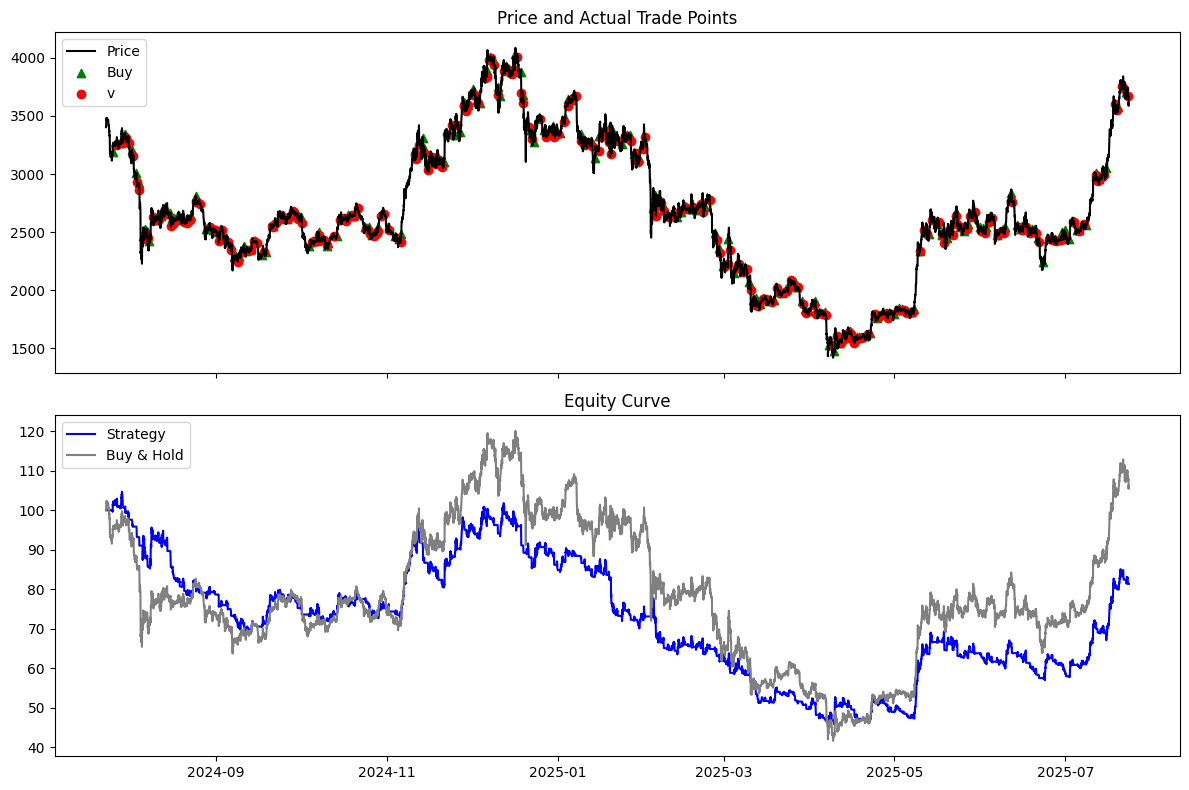

In [1]:
from Datafetcher.binance_data_fetcher import get_crypto_prices,get_binance_trading_pairs
from datetime import datetime, timedelta

# 取得熱門幣種
end_date = datetime.now()
start_date = end_date - timedelta(days=365)
top_n_list = get_binance_trading_pairs(top_n=11)
print(top_n_list)

# 數據區
data = get_crypto_prices('ETH',"usdt", start_date, end_date, interval="1h")
display(data)

# 策略區
from Strategy.sma import add_sma_signals
data["signal"] = add_sma_signals(data,n1=5,n2=20)['signal']

# 回測區
from Backtest.backtest import run_backtest,plot_result
import matplotlib.pyplot as plt
import pandas as pd
result = run_backtest(df=data, initial_capital=100, commission_rate = 0.001, slippage = 0.0005, risk_free_rate = 0.02)
display(pd.DataFrame(result['metrics'],index=['回測結果']).T)
plot_result(result)


# commit sma策略

['ETH', 'BTC', 'USDC', 'SOL', 'XRP', 'FDUSD', 'BNB', 'DOGE', 'SPK', 'PENGU', 'PEPE']

--- Starting to fetch GitHub Commit data for ethereum/go-ethereum ---
DEBUG(GitHub API): All requested dates are already in cache.
Successfully consolidated 855 GitHub Commit data points for the requested range.


100%|██████████| 365/365 [00:00<00:00, 9111.27it/s]


,回測結果
策略總報酬率,-30.39%
最終資產,$69.61
最大回撤,-61.19%
夏普率,-0.39
總交易次數,33
勝率,45.45%
Profit Factor,0.71
總手續費,$5.41
平均持有週期 (K棒數),5.06
平均交易獲利,$-0.84


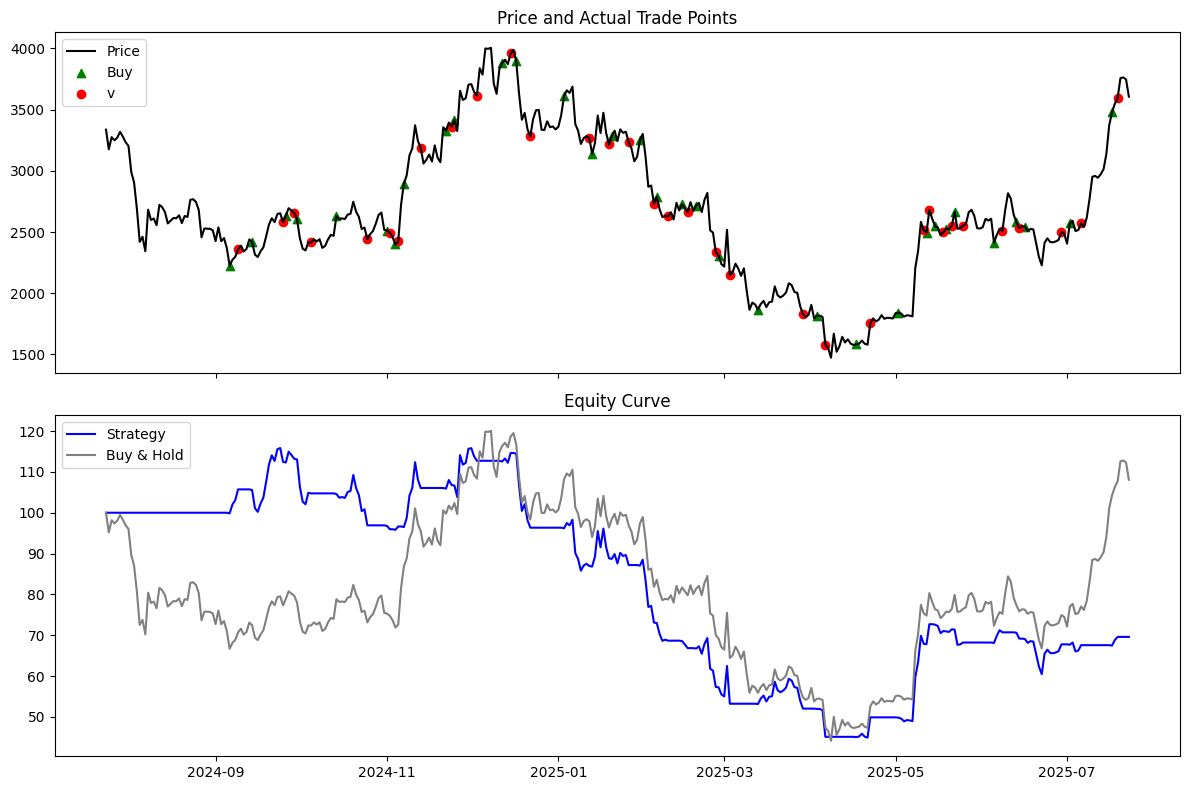

In [4]:
from Datafetcher.binance_data_fetcher import get_crypto_prices,get_binance_trading_pairs
from datetime import datetime, timedelta

# 取得熱門幣種
end_date = datetime.now()
start_date = end_date - timedelta(days=365)
top_n_list = get_binance_trading_pairs(top_n=11)
print(top_n_list)

# 數據區
data = get_crypto_prices('ETH',"usdt", start_date, end_date, interval="1d")

from Datafetcher.github_data_fetcher import get_github_commits
from config import github_headers,PREDEFINED_CRYPTOS
owner = PREDEFINED_CRYPTOS["ethereum"]["github_owner"]
repo = PREDEFINED_CRYPTOS["ethereum"]["github_repo"]
commit_data = get_github_commits(owner, repo, start_date, end_date, github_headers)
commit_data = commit_data['date'].value_counts().sort_index().to_frame()
commit_data.columns = ['commit_count']

import pandas as pd
aligned_commit_data = commit_data.reindex(data.index, fill_value=0)
merged_df = pd.concat([data, aligned_commit_data], axis=1)

# 策略區
from Strategy.commit_sma import add_commit_sma_signals
merged_df["signal"] = add_commit_sma_signals(merged_df,n1=5,n2=20)['signal']

# 回測區
from Backtest.backtest import run_backtest,plot_result
import matplotlib.pyplot as plt
import pandas as pd
result = run_backtest(df=merged_df, initial_capital=100, commission_rate = 0.001, slippage = 0.0005, risk_free_rate = 0.02)
display(pd.DataFrame(result['metrics'],index=['回測結果']).T)
plot_result(result)


['ETH', 'BTC', 'USDC', 'SOL', 'XRP', 'FDUSD', 'BNB', 'DOGE', 'SPK', 'PENGU', 'PEPE']


,open,high,low,close,volume
open_time,,,,,
2024-07-23 16:00:00,3454.38,3469.44,3402.55,3403.49,36921.1350
2024-07-23 17:00:00,3403.49,3429.99,3389.00,3427.97,24809.7174
2024-07-23 18:00:00,3427.96,3452.77,3418.89,3446.26,13944.5442
2024-07-23 19:00:00,3446.26,3496.49,3445.27,3457.03,33369.9042
2024-07-23 20:00:00,3457.03,3489.34,3454.94,3481.65,17426.4676
...,...,...,...,...,...
2025-07-23 11:00:00,3665.78,3676.51,3648.31,3671.99,16160.6480
2025-07-23 12:00:00,3671.99,3680.68,3634.00,3640.25,24520.8167
2025-07-23 13:00:00,3640.24,3663.09,3573.47,3587.42,124610.4921


100%|██████████| 8760/8760 [00:00<00:00, 33603.26it/s]


,回測結果
策略總報酬率,243.68%
最終資產,$343.68
最大回撤,-30.41%
夏普率,0.15
總交易次數,7
勝率,42.86%
Profit Factor,3.79
總手續費,$1.42
平均持有週期 (K棒數),506.86
平均交易獲利,$10.34


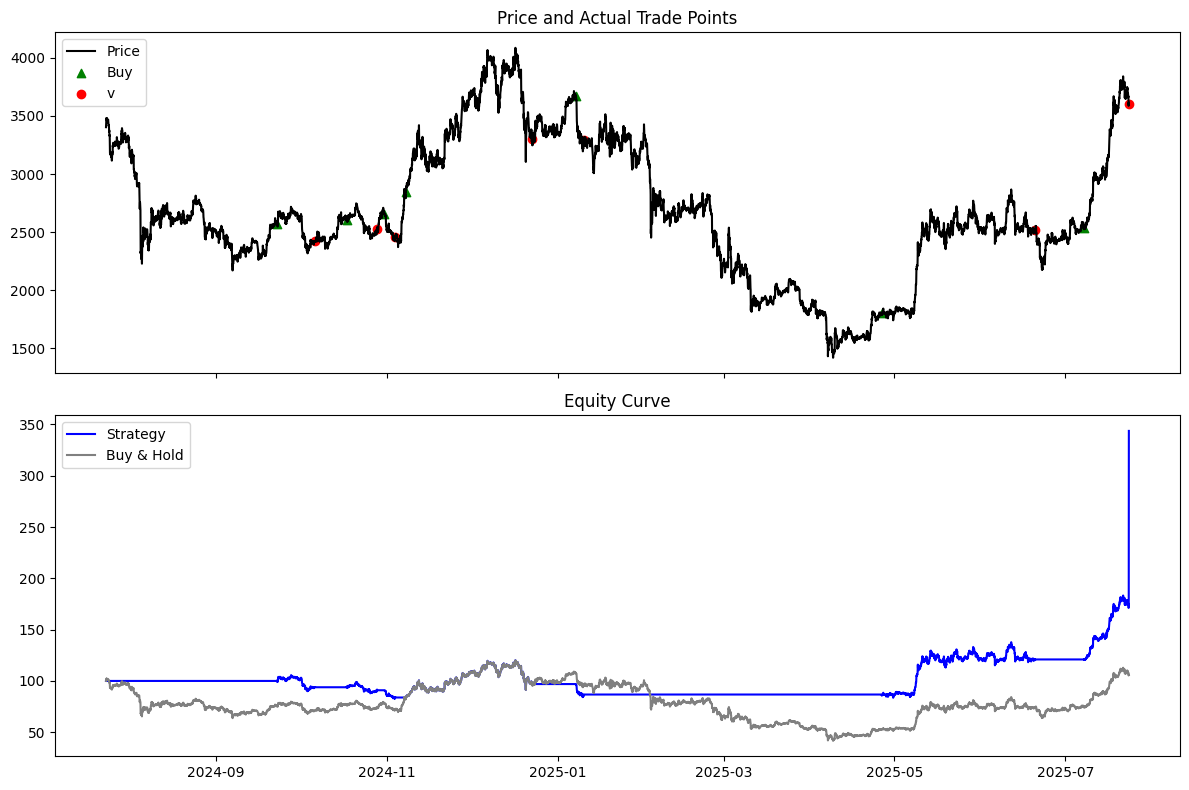

In [5]:
from Datafetcher.binance_data_fetcher import get_crypto_prices,get_binance_trading_pairs
from datetime import datetime, timedelta

# 取得熱門幣種
end_date = datetime.now()
start_date = end_date - timedelta(days=365)
top_n_list = get_binance_trading_pairs(top_n=11)
print(top_n_list)

# 數據區
data = get_crypto_prices('ETH',"usdt", start_date, end_date, interval="1h")
display(data)

# 策略區
from Strategy.smartmoney import add_smartmoney_signals
data["signal"] = add_smartmoney_signals(data)['signal']

# 回測區
from Backtest.backtest import run_backtest,plot_result
import matplotlib.pyplot as plt
import pandas as pd
result = run_backtest(df=data, initial_capital=100, commission_rate = 0.001, slippage = 0.0005, risk_free_rate = 0.02)
display(pd.DataFrame(result['metrics'],index=['回測結果']).T)
plot_result(result)


# macd策略

['ETH', 'BTC', 'USDC', 'SOL', 'XRP', 'FDUSD', 'BNB', 'DOGE', 'SPK', 'PENGU', 'PEPE']


,open,high,low,close,volume
open_time,,,,,
2024-07-23 16:00:00,3454.38,3469.44,3402.55,3403.49,36921.1350
2024-07-23 17:00:00,3403.49,3429.99,3389.00,3427.97,24809.7174
2024-07-23 18:00:00,3427.96,3452.77,3418.89,3446.26,13944.5442
2024-07-23 19:00:00,3446.26,3496.49,3445.27,3457.03,33369.9042
2024-07-23 20:00:00,3457.03,3489.34,3454.94,3481.65,17426.4676
...,...,...,...,...,...
2025-07-23 11:00:00,3665.78,3676.51,3648.31,3671.99,16160.6480
2025-07-23 12:00:00,3671.99,3680.68,3634.00,3640.25,24520.8167
2025-07-23 13:00:00,3640.24,3663.09,3573.47,3587.42,124610.4921


100%|██████████| 8760/8760 [00:00<00:00, 31188.12it/s]


,回測結果
策略總報酬率,-36.40%
最終資產,$63.60
最大回撤,-61.56%
夏普率,-0.35
總交易次數,325
勝率,33.23%
Profit Factor,0.93
總手續費,$42.53
平均持有週期 (K棒數),13.38
平均交易獲利,$-0.05


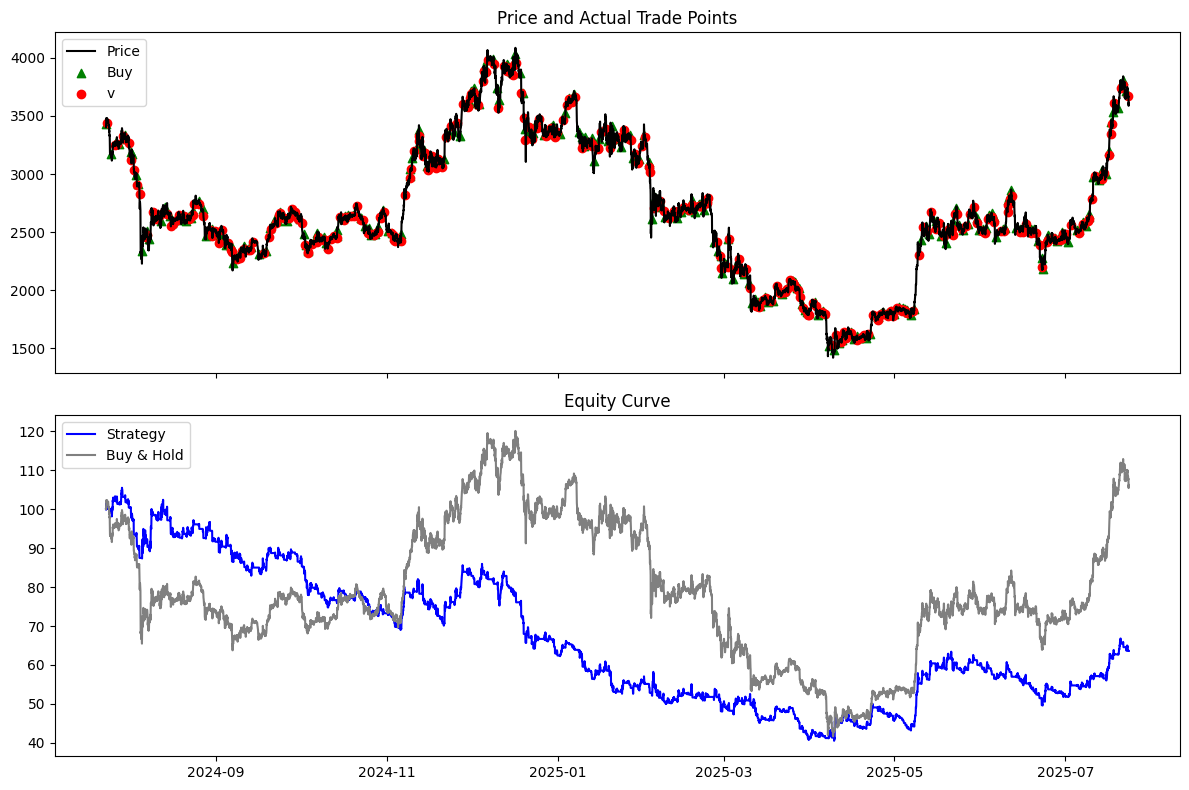

In [6]:
from Datafetcher.binance_data_fetcher import get_crypto_prices,get_binance_trading_pairs
from datetime import datetime, timedelta

# 取得熱門幣種
end_date = datetime.now()
start_date = end_date - timedelta(days=365)
top_n_list = get_binance_trading_pairs(top_n=11)
print(top_n_list)

# 數據區
data = get_crypto_prices('ETH',"usdt", start_date, end_date, interval="1h")
display(data)

# 策略區
from Strategy.macd import add_macd_signals
data["signal"] = add_macd_signals(data)['signal']

# 回測區
from Backtest.backtest import run_backtest,plot_result
import matplotlib.pyplot as plt
import pandas as pd
result = run_backtest(df=data, initial_capital=100, commission_rate = 0.001, slippage = 0.0005, risk_free_rate = 0.02)
display(pd.DataFrame(result['metrics'],index=['回測結果']).T)
plot_result(result)


# rsi策略

['ETH', 'BTC', 'USDC', 'SOL', 'XRP', 'FDUSD', 'BNB', 'DOGE', 'SPK', 'PENGU', 'PEPE']


,open,high,low,close,volume
open_time,,,,,
2024-07-23 16:00:00,3454.38,3469.44,3402.55,3403.49,36921.1350
2024-07-23 17:00:00,3403.49,3429.99,3389.00,3427.97,24809.7174
2024-07-23 18:00:00,3427.96,3452.77,3418.89,3446.26,13944.5442
2024-07-23 19:00:00,3446.26,3496.49,3445.27,3457.03,33369.9042
2024-07-23 20:00:00,3457.03,3489.34,3454.94,3481.65,17426.4676
...,...,...,...,...,...
2025-07-23 11:00:00,3665.78,3676.51,3648.31,3671.99,16160.6480
2025-07-23 12:00:00,3671.99,3680.68,3634.00,3640.25,24520.8167
2025-07-23 13:00:00,3640.24,3663.09,3573.47,3587.42,124610.4921


100%|██████████| 8760/8760 [00:00<00:00, 31719.54it/s]


,回測結果
策略總報酬率,63.90%
最終資產,$163.90
最大回撤,-54.15%
夏普率,0.04
總交易次數,102
勝率,59.80%
Profit Factor,0.92
總手續費,$14.70
平均持有週期 (K棒數),44.01
平均交易獲利,$-0.11


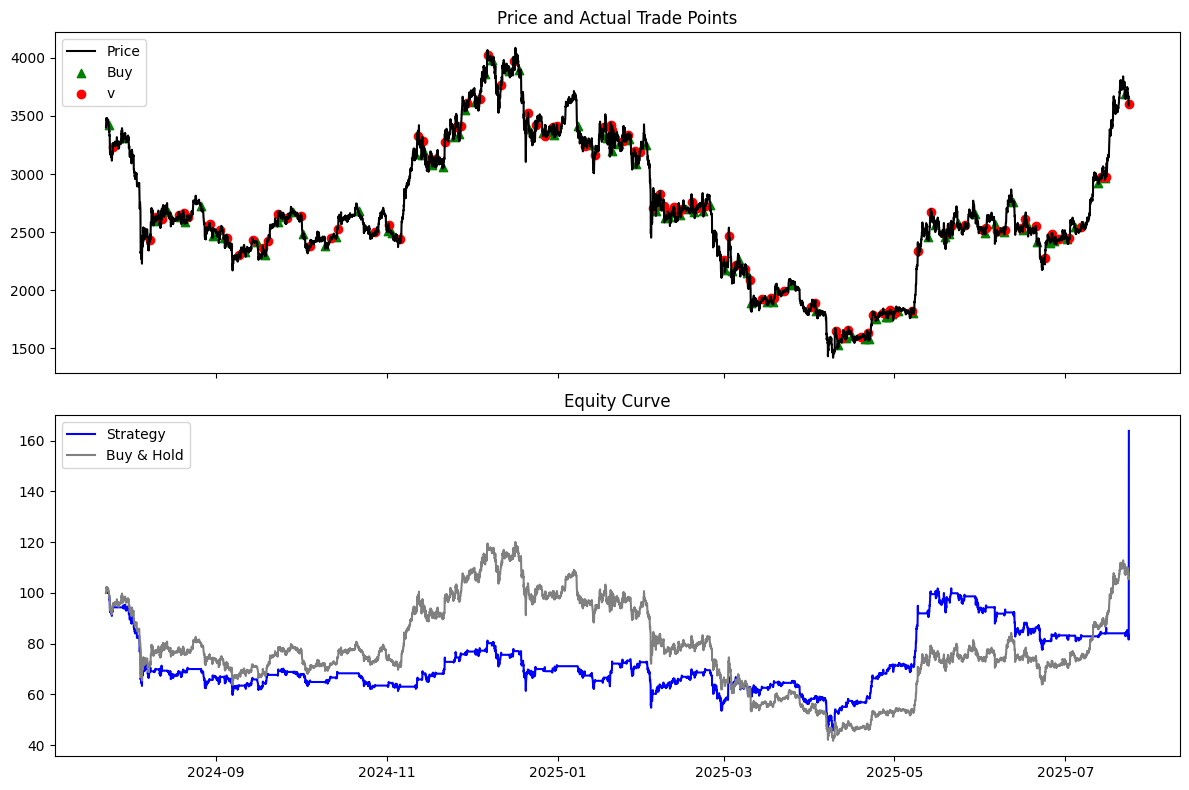

In [7]:
from Datafetcher.binance_data_fetcher import get_crypto_prices,get_binance_trading_pairs
from datetime import datetime, timedelta

# 取得熱門幣種
end_date = datetime.now()
start_date = end_date - timedelta(days=365)
top_n_list = get_binance_trading_pairs(top_n=11)
print(top_n_list)

# 數據區
data = get_crypto_prices('ETH',"usdt", start_date, end_date, interval="1h")
display(data)

# 策略區
from Strategy.rsi import add_rsi_signals
data["signal"] = add_rsi_signals(data)['signal']

# 回測區
from Backtest.backtest import run_backtest,plot_result
import matplotlib.pyplot as plt
import pandas as pd
result = run_backtest(df=data, initial_capital=100, commission_rate = 0.001, slippage = 0.0005, risk_free_rate = 0.02)
display(pd.DataFrame(result['metrics'],index=['回測結果']).T)
plot_result(result)
